# Project-5 Etude de Marché-Part-2

L'objectif est d'aider à cibler certains pays, en approfondissant l'étude de marché. 

Plus précisément, l'idéal serait de produire des "groupes" de pays par différentes méthodes.

La stratégie consiste à exporter les produits plutôt que de les produire localement, c'est-à-dire dans les nouveaux pays ciblés.

# Mission

Identifier les pays susceptibles d'être inclus dans le marché du poulet. 

L'échantillon contient tous les pays disponibles, chacun étant caractérisé par ces variables :

1. la différence de population entre une année précédente (votre choix) et l'année en cours, exprimée en pourcentage ;

2. proportion de protéines animales par rapport aux protéines totales dans la disponibilité alimentaire du pays ;
disponibilité alimentaire en protéines par habitant ;

3. disponibilité alimentaire en calories par habitant.

4. un dendrogramme contenant l'ensemble des pays étudiés, puis découpez-le pour obtenir 5 groupes.

5. le calcul de la position du centroïde de chaque groupe. 

6. courte liste de pays à cibler, présentant leurs caractéristiques. A

7. Visualisez vos partitions dans le premier plan factoriel obtenu par l'ACP.

8. Ensuite, effectuez les tests statistiques suivants :

un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouvez pertinentes, trouvez une variable dont la distribution est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous avez déterminés. Sur ces 2 clusters, testez la variable gaussienne par un test de comparaison.


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Import des librairies
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import sklearn as sk

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn import decomposition, preprocessing

In [3]:
df_final_analysis=pd.read_csv("df_final_etude_de_marche_part_1.csv")

We will carry out a study on our data in order to find countries that would be profitable

In [4]:
df_analysis=df_final_analysis.copy()

In [5]:
df_analysis.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd
0,Afrique du Sud,55805.974328,3412.061790,16.1,46.5,6.153459e+09,6.412963e+09,7394000.0,8671000.0,7992000.0,9671000.0
1,Allemagne,94154.023284,3910.072148,2.5,51.8,4.464274e+10,4.799347e+10,193759000.0,185487000.0,654322000.0,680352000.0
2,Antigua-et-Barbuda,47683.738109,276.093222,12.8,51.1,1.439025e+10,1.562905e+10,35000.0,84000.0,6000.0,2000.0
3,Arabie saoudite,43484.242388,1513.093222,30.2,51.8,2.090539e+10,2.331989e+10,17495000.0,19146000.0,12897000.0,7157000.0
4,Argentine,104493.657313,202.077685,10.7,27.7,1.451729e+10,1.160189e+10,14940000.0,13863000.0,1445000.0,29925500.0


we will form groups of similar countries. This will allow us to quickly choose the most promising groups and to have an idea of the type of countries present in them.

# Hierarchical clustering of our data

In [6]:
df_cluster=df_analysis.copy()

In [7]:
#Indexation according to countries by the .set_index() function
df_cluster.set_index('Zone', inplace=True)
X = df_cluster.values
X.shape

(96, 10)

In [8]:
#Centering / reducing data so that our data can take the same importance
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster. Below is the dendrogram diagram

In [9]:
#Hierarchical clustering: creation of a link matrix using Ward's method
Y = linkage(X_scaled, method = 'ward', metric='euclidean')

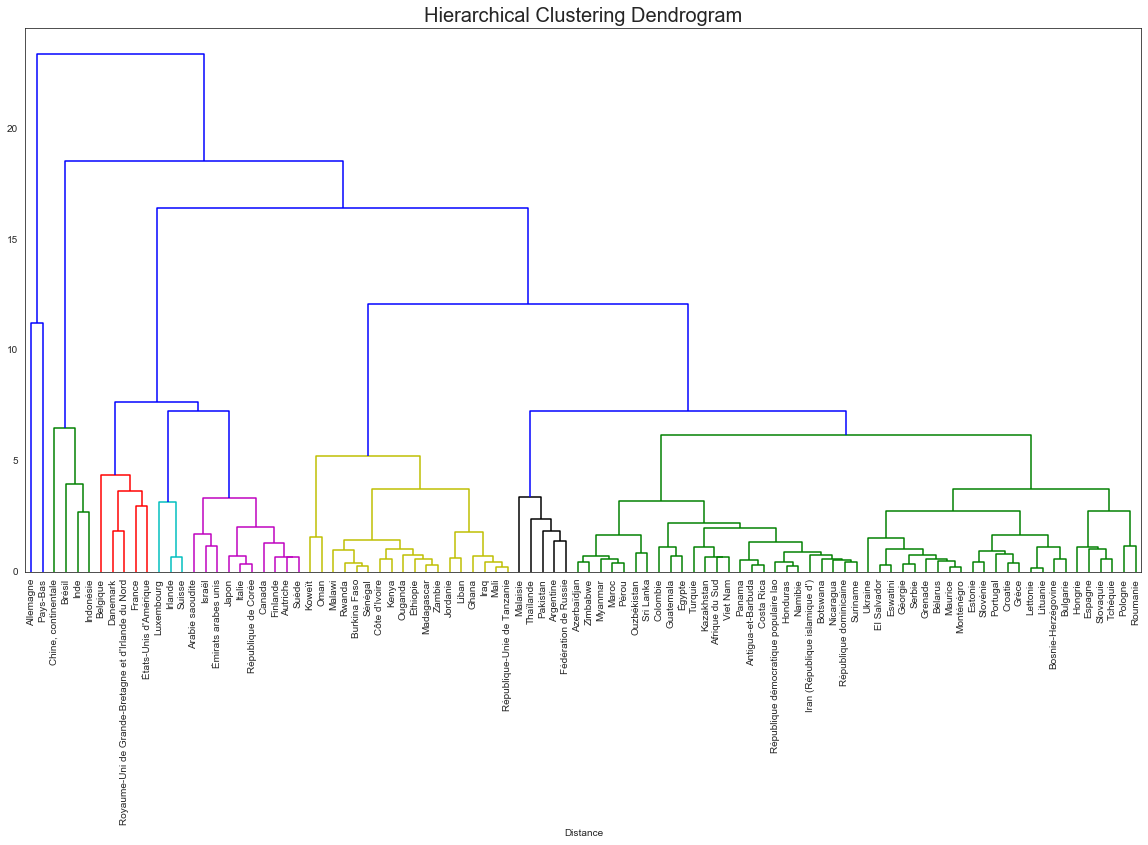

In [10]:
#Display of a first global dendrogram
fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram',fontsize=20)
plt.xlabel('Distance')

dendrogram(Y, labels=df_cluster.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.show()

# AgglomerativeClustering 

In [11]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [12]:
y_hc=hc.fit_predict(Y)

In [13]:
y_hc

array([1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 3, 4, 1, 4, 1, 1, 1, 1, 3, 3, 2, 1, 1, 3, 3, 1, 2, 1, 1, 2,
       2, 1, 2, 3, 2, 2, 3, 3, 2, 1, 1, 3, 2, 4, 0, 2, 1, 2, 0, 3, 2, 2,
       1, 0, 0, 0, 2, 4, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 3, 0,
       0, 0, 1, 0, 0, 0, 0], dtype=int64)

Visualizing the clusters. This code is similar to k-means 

visualization code. We only replace the y_kmeans vector name to #y_hc for the hierarchical clustering

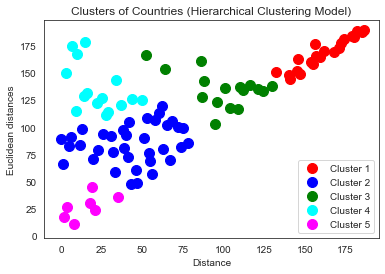

In [14]:
plt.scatter(Y[y_hc==0, 0], Y[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(Y[y_hc==1, 0], Y[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(Y[y_hc==2, 0], Y[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(Y[y_hc==3, 0], Y[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(Y[y_hc==4, 0], Y[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.title('Clusters of Countries (Hierarchical Clustering Model)')
plt.xlabel('Distance')
plt.ylabel('Euclidean distances')
plt.legend()
plt.show()

Cutting the dendrogram into 5 groups to have a first idea of the partitioning

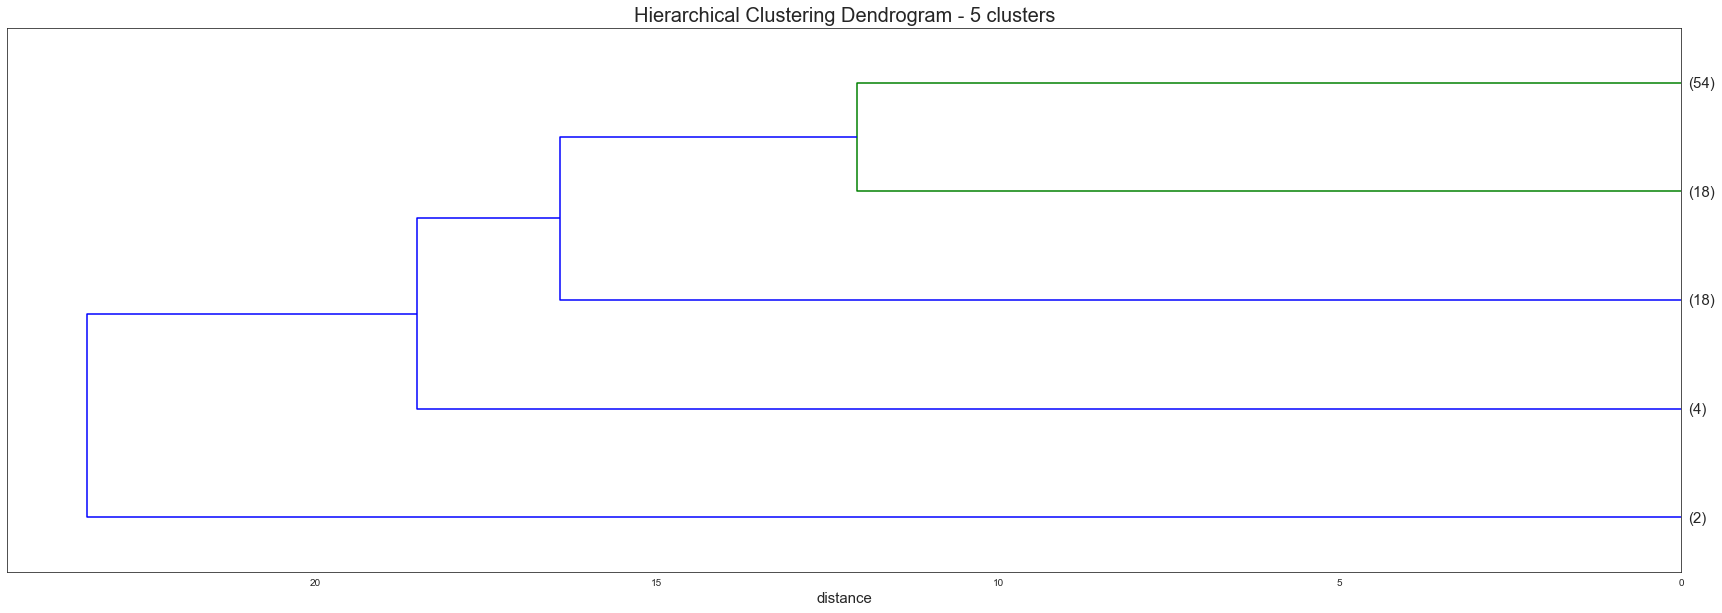

In [15]:
fig = plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Y, labels = df_cluster.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

#### There are 5 groups of countries

In [16]:
#Identification of the 5 groups obtained
groupes_HC = fcluster(Y, 5, criterion='maxclust')
print('HC groupes : ' + str(np.unique(groupes_HC)))

index_1 = np.argsort(groupes_HC)

#Affichage des pays selon leurs groupes
df_groupes_HC = pd.DataFrame(df_cluster.index[index_1], groupes_HC[index_1]).reset_index()
df_groupes_HC = df_groupes_HC.rename(columns={'index':'Cluster'})

HC groupes : [1 2 3 4 5]


In [17]:
df_groupes_HC = pd.merge(df_cluster, df_groupes_HC, on='Zone')

In [18]:
df_groupes_HC.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster
0,Afrique du Sud,55805.974328,3412.061790,16.1,46.5,6.153459e+09,6.412963e+09,7394000.0,8671000.0,7992000.0,9671000.0,5
1,Allemagne,94154.023284,3910.072148,2.5,51.8,4.464274e+10,4.799347e+10,193759000.0,185487000.0,654322000.0,680352000.0,1
2,Antigua-et-Barbuda,47683.738109,276.093222,12.8,51.1,1.439025e+10,1.562905e+10,35000.0,84000.0,6000.0,2000.0,5
3,Arabie saoudite,43484.242388,1513.093222,30.2,51.8,2.090539e+10,2.331989e+10,17495000.0,19146000.0,12897000.0,7157000.0,3
4,Argentine,104493.657313,202.077685,10.7,27.7,1.451729e+10,1.160189e+10,14940000.0,13863000.0,1445000.0,29925500.0,5


In [19]:
#list(df_groupes_HC.Zone)

In [20]:
#Characterization of the 5 groups according to the variables:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe1_HC = df_groupes_HC[df_groupes_HC['Cluster'] == 1]
df_groupe2_HC = df_groupes_HC[df_groupes_HC['Cluster'] == 2]
df_groupe3_HC = df_groupes_HC[df_groupes_HC['Cluster'] == 3]
df_groupe4_HC = df_groupes_HC[df_groupes_HC['Cluster'] == 4]
df_groupe5_HC = df_groupes_HC[df_groupes_HC['Cluster'] == 5]

In [21]:
df_groupes_HC.groupby('Cluster').mean()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd
Cluster,,,,,,,,,,
1,71962.181791,3079.469200,2.750000,51.700000,4.679521e+10,5.074926e+10,4.908070e+08,4.816465e+08,5.137050e+08,5.250245e+08
2,307369.047761,19620.857506,10.250000,11.200000,6.058593e+09,6.109294e+09,1.090125e+07,1.687400e+07,1.809150e+07,1.965125e+07
3,55630.332482,1691.514668,10.983333,52.527778,5.008495e+10,5.338347e+10,2.584611e+07,2.707967e+07,4.350656e+07,5.443956e+07
4,31059.047286,1071.086177,37.905556,61.844444,4.304459e+09,4.791116e+09,2.955778e+06,4.860416e+06,1.941221e+06,3.824667e+06
5,50516.817000,1001.846848,7.109259,48.796296,9.060775e+09,9.752331e+09,1.301169e+07,1.463718e+07,1.175887e+07,1.513381e+07


#### From the centroids calculated above, group 4 & 3  is differentiated by a high Proportion_of_protien_animale(%). After that, group 1 also presents an interesting market potential. 

#### Centroid

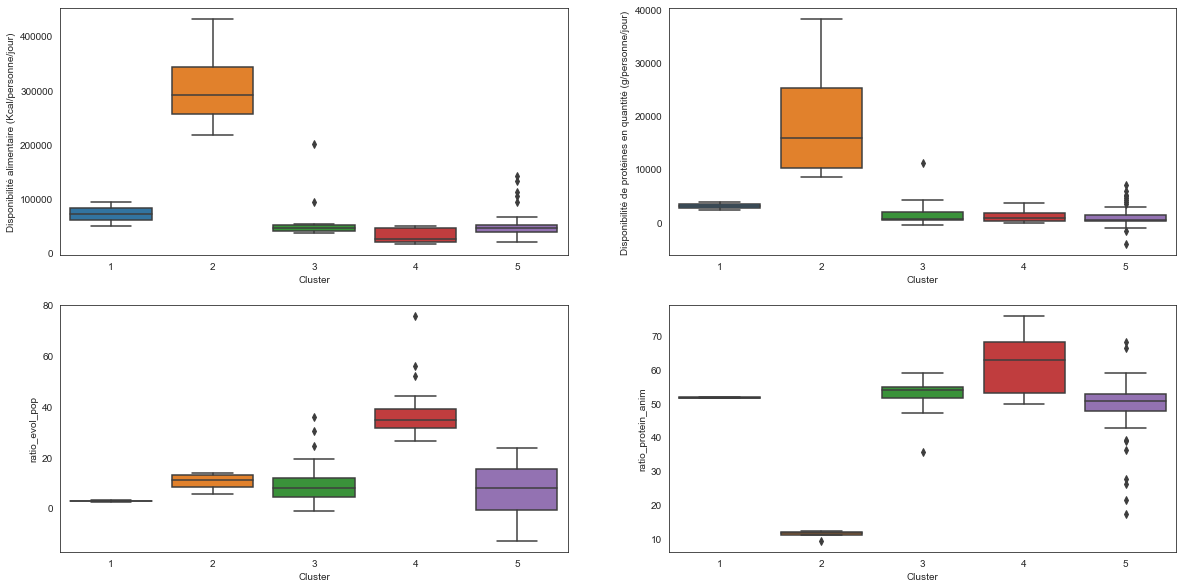

In [22]:
# Graphiques variables par clusters
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
plt.subplot(221)
sns.boxplot(x=df_groupes_HC["Cluster"], y = df_groupes_HC["Disponibilité alimentaire (Kcal/personne/jour)"])
plt.subplot(222)
sns.boxplot(x=df_groupes_HC["Cluster"], y = df_groupes_HC["Disponibilité de protéines en quantité (g/personne/jour)"])
plt.subplot(223)
sns.boxplot(x=df_groupes_HC["Cluster"], y = df_groupes_HC["ratio_evol_pop"])
plt.subplot(224)
sns.boxplot(x=df_groupes_HC["Cluster"], y = df_groupes_HC["ratio_protein_anim"])
plt.show()

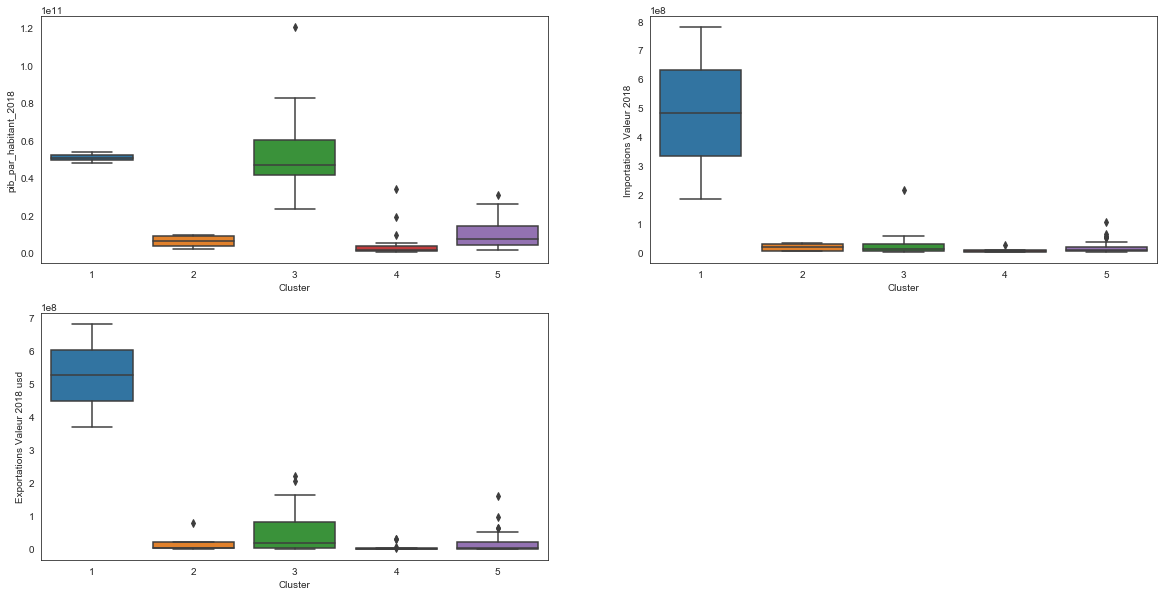

In [23]:
plt.subplot(221)
sns.boxplot(x=df_groupes_HC["Cluster"], y = df_groupes_HC["pib_par_habitant_2018"])
plt.subplot(222)
sns.boxplot(x=df_groupes_HC["Cluster"], y = df_groupes_HC["Importations Valeur 2018"])
plt.subplot(223)
sns.boxplot(x=df_groupes_HC["Cluster"], y = df_groupes_HC["Exportations Valeur 2018 usd"])
plt.show()

In [24]:
df_groupes_HC.loc[df_groupes_HC['Zone'] == 'France']

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster
26,France,93271.478607,11235.062148,4.5,47.2,3.856657e+10,4.116865e+10,26061000.0,29312000.0,169977000.0,220354000.0,3


####  France in cluster 3

In [25]:
# nombre de pays dans clusters 5
len(df_groupes_HC.loc[df_groupes_HC["Cluster"]==5])

54

In [26]:
# nombre de pays dans clusters 4 
len(df_groupes_HC.loc[df_groupes_HC["Cluster"]==4])

18

In [27]:
# nombre de pays dans clusters 3 
len(df_groupes_HC.loc[df_groupes_HC["Cluster"]==3])

18

#### The countries in groups 4 and 3 are selected on the basis of the ratio of animal protein to total protein.

In [28]:
#Pays du groupe 4 et 3 identifiés comme potentiellement intéressants
print(df_groupe4_HC['Zone'].unique())

['Burkina Faso' "Côte d'Ivoire" 'Ghana' 'Iraq' 'Jordanie' 'Kenya' 'Koweït'
 'Liban' 'Madagascar' 'Malawi' 'Mali' 'Oman' 'Ouganda' 'Rwanda'
 'République-Unie de Tanzanie' 'Sénégal' 'Zambie' 'Éthiopie']


In [29]:
print(df_groupe3_HC['Zone'].unique())

['Arabie saoudite' 'Autriche' 'Belgique' 'Canada' 'Danemark' 'Finlande'
 'France' 'Irlande' 'Israël' 'Italie' 'Japon' 'Luxembourg'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'République de Corée' 'Suisse' 'Suède' 'Émirats arabes unis'
 "États-Unis d'Amérique"]


#### Other clusters pays

In [30]:
print(df_groupe1_HC['Zone'].unique())

['Allemagne' 'Pays-Bas']


In [31]:
print(df_groupe2_HC['Zone'].unique())

['Brésil' 'Chine, continentale' 'Inde' 'Indonésie']


In [32]:
print(df_groupe5_HC['Zone'].unique())

['Afrique du Sud' 'Antigua-et-Barbuda' 'Argentine' 'Azerbaïdjan'
 'Bosnie-Herzégovine' 'Botswana' 'Bulgarie' 'Bélarus' 'Colombie'
 'Costa Rica' 'Croatie' 'El Salvador' 'Espagne' 'Estonie' 'Eswatini'
 'Fédération de Russie' 'Grenade' 'Grèce' 'Guatemala' 'Géorgie' 'Honduras'
 'Hongrie' "Iran (République islamique d')" 'Kazakhstan' 'Lettonie'
 'Lituanie' 'Malaisie' 'Maroc' 'Maurice' 'Monténégro' 'Myanmar' 'Namibie'
 'Nicaragua' 'Ouzbékistan' 'Pakistan' 'Panama' 'Pologne' 'Portugal'
 'Pérou' 'Roumanie' 'République dominicaine'
 'République démocratique populaire lao' 'Serbie' 'Slovaquie' 'Slovénie'
 'Sri Lanka' 'Suriname' 'Tchéquie' 'Thaïlande' 'Turquie' 'Ukraine'
 'Viet Nam' 'Zimbabwe' 'Égypte']


### Extract countries on the basis of groupe (4,3)

In [33]:
df_HC_subset = df_groupes_HC.query('[3,4] in Cluster') 
df_HC_subset.shape

(36, 12)

In [34]:
df_HC_subset.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster
3,Arabie saoudite,43484.242388,1513.093222,30.2,51.8,2.090539e+10,2.331989e+10,17495000.0,19146000.0,12897000.0,7157000.0,3
5,Autriche,40398.884975,240.088043,6.6,53.6,4.788717e+10,5.204726e+10,32714000.0,36944000.0,13086000.0,15975000.0,3
7,Belgique,44544.250945,2041.066611,6.5,56.1,4.411893e+10,4.722576e+10,207538000.0,213538000.0,120048000.0,161248000.0,3
12,Burkina Faso,16335.625473,-159.911957,34.5,72.8,7.382748e+08,8.201668e+08,233000.0,384000.0,135000.0,75000.0,4
14,Canada,50578.429652,3010.512506,11.2,54.7,4.505729e+10,4.634337e+10,52627000.0,57158000.0,19362000.0,17225000.0,3


In conclusion, this first partitioning shows that 36 countries are likely to become a relevant target for the company. The demand will be present in these countries, especially in terms of animal protein requirements.

In [35]:
#df_HC_subset.to_csv("group_3&4_countries_from HCH.csv")

### ACP (Principal Component Analysis)

In [36]:
pca=decomposition.PCA(svd_solver='full')
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

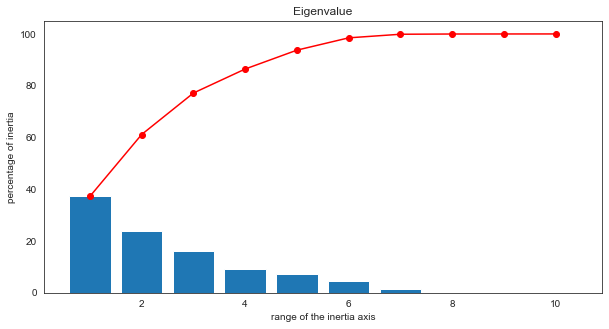

In [37]:
plt.rcParams["figure.figsize"] = (10, 5)
pca=decomposition.PCA()
pca.fit(X_scaled)
var= pca.explained_variance_ratio_*100

plt.bar(np.arange(len(var))+1,var)
plt.plot(np.arange(len(var))+1,var.cumsum(),c="red",marker='o')

plt.xlabel("range of the inertia axis")
plt.ylabel("percentage of inertia")
plt.title("Eigenvalue")
plt.show()

In [38]:
print(pca.explained_variance_ratio_)

[3.72516394e-01 2.38998864e-01 1.60205247e-01 9.27950341e-02
 7.29185831e-02 4.75043760e-02 1.38933917e-02 9.08073364e-04
 1.62904225e-04 9.71323246e-05]


In [39]:
print(pca.explained_variance_ratio_.cumsum())

[0.37251639 0.61151526 0.77172051 0.86451554 0.93743412 0.9849385
 0.99883189 0.99973996 0.99990287 1.        ]


### Circle de correlation

In [40]:
pcs=pca.components_

#### (0,1)

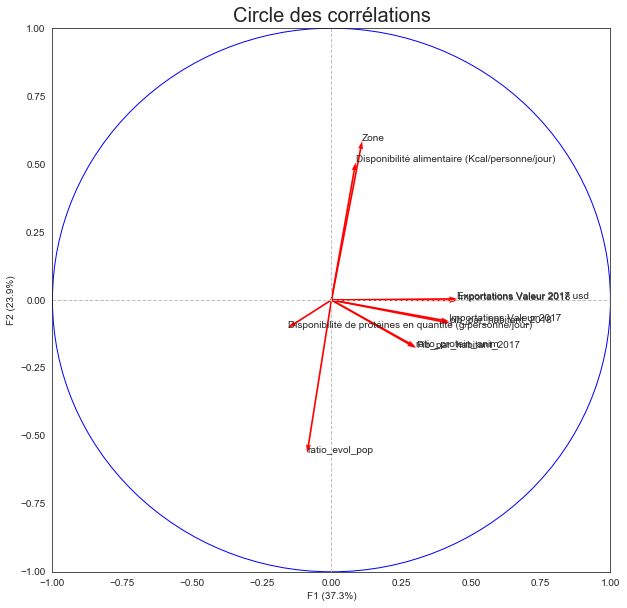

In [41]:
fig=plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]),np.zeros(pcs.shape[1]),pcs[0,:],pcs[1,:],angles='xy',scale_units='xy',
          scale=1, color='r',width=0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df_HC_subset.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Circle des corrélations', fontsize=20)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.show()

#### (2,3)

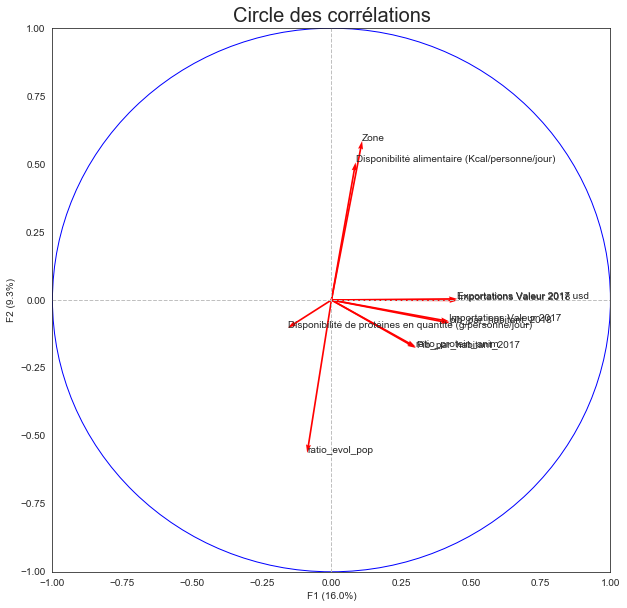

In [42]:
fig=plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]),np.zeros(pcs.shape[1]),pcs[0,:],pcs[1,:],angles='xy',scale_units='xy',
          scale=1, color='r',width=0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df_HC_subset.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Circle des corrélations', fontsize=20)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[2],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[3],1)))
plt.show()

#### (4,5)

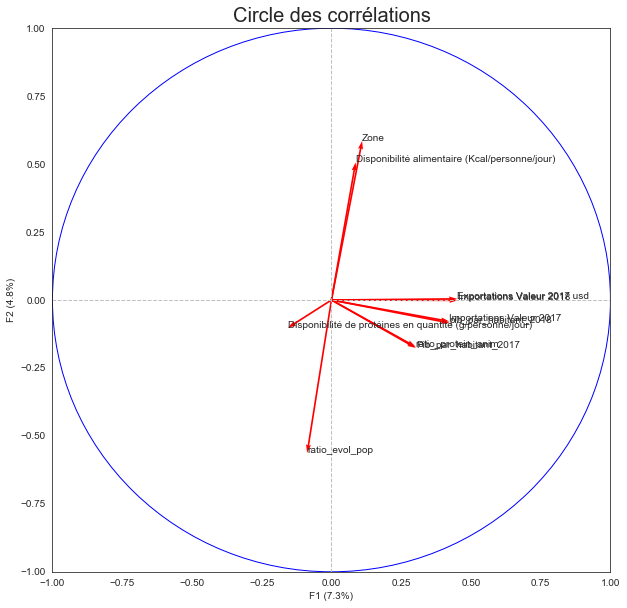

In [43]:
fig=plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]),np.zeros(pcs.shape[1]),pcs[0,:],pcs[1,:],angles='xy',scale_units='xy',
          scale=1, color='r',width=0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df_HC_subset.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Circle des corrélations', fontsize=20)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[4],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[5],1)))
plt.show()

In [44]:
df_HC_subset.head(2)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster
3,Arabie saoudite,43484.242388,1513.093222,30.2,51.8,2.090539e+10,2.331989e+10,17495000.0,19146000.0,12897000.0,7157000.0,3
5,Autriche,40398.884975,240.088043,6.6,53.6,4.788717e+10,5.204726e+10,32714000.0,36944000.0,13086000.0,15975000.0,3


In [45]:
df_HC_subset.shape

(36, 12)

In [46]:
# composantes F1
# Disponibility alimentaire", "Disponibility protein", "Ratio evol popultion", "Protein _animal ratio"
f1 = pca.components_[0]
print(f1)

[ 0.10989425  0.08658975 -0.15603212 -0.08694992  0.30191048  0.3023421
  0.42338081  0.42210071  0.45301906  0.45090119]


In [47]:
# composantes F2
# Disponibility alimentaire", "Disponibility protein", "Ratio evol popultion", "Protein _animal ratio"
f2 = pca.components_[1]
print(f2)

[ 0.58529275  0.50621496 -0.10222785 -0.56270132 -0.17214266 -0.17632531
 -0.0846497  -0.0786547  -0.00135402  0.00422242]


#### Interpretation circle correlations

##### F1 characterizes countries where food data are already important.
##### F2 characterizes the countries for which the evolution of the population is important

In [48]:
df_groupes_HC.loc[df_groupes_HC["Cluster"]==1]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster
1,Allemagne,94154.023284,3910.072148,2.5,51.8,4.464274e+10,4.799347e+10,193759000.0,185487000.0,654322000.0,680352000.0,1
66,Pays-Bas,49770.340299,2248.866253,3.0,51.6,4.894768e+10,5.350505e+10,787855000.0,777806000.0,373088000.0,369697000.0,1


In [49]:
df_groupes_HC.loc[df_groupes_HC["Cluster"]==2]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster
10,Brésil,430792.746667,8553.077685,9.1,9.3,9.812311e+09,8.861532e+09,1425000.0,3760000.0,69981000.0,76836000.0,2
15,"Chine, continentale",269052.982886,38205.097685,5.5,12.2,8.615411e+09,9.616756e+09,18653000.0,28613000.0,2234000.0,969000.0,2
35,Inde,312622.527562,20941.192506,12.7,11.6,1.960223e+09,2.052618e+09,2587000.0,4044000.0,150000.0,733000.0,2
36,Indonésie,217007.933930,10784.062148,13.7,11.7,3.846427e+09,3.906270e+09,20940000.0,31079000.0,1000.0,67000.0,2


In [50]:
df_groupes_HC.loc[df_groupes_HC["Cluster"]==3]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster
3,Arabie saoudite,43484.242388,1513.093222,30.2,51.8,2.090539e+10,2.331989e+10,17495000.0,19146000.0,12897000.0,7157000.0,3
5,Autriche,40398.884975,240.088043,6.6,53.6,4.788717e+10,5.204726e+10,32714000.0,36944000.0,13086000.0,15975000.0,3
7,Belgique,44544.250945,2041.066611,6.5,56.1,4.411893e+10,4.722576e+10,207538000.0,213538000.0,120048000.0,161248000.0,3
14,Canada,50578.429652,3010.512506,11.2,54.7,4.505729e+10,4.634337e+10,52627000.0,57158000.0,19362000.0,17225000.0,3
20,Danemark,38144.340299,848.376611,4.6,54.9,5.745429e+10,6.180975e+10,9861000.0,9978000.0,83462000.0,96685000.0,3
25,Finlande,36133.429652,-109.911957,3.8,54.6,4.618041e+10,4.995534e+10,1212000.0,1626000.0,53000.0,1573000.0,3
26,France,93271.478607,11235.062148,4.5,47.2,3.856657e+10,4.116865e+10,26061000.0,29312000.0,169977000.0,220354000.0,3
39,Irlande,43088.063682,773.262148,9.1,59.1,7.049292e+10,7.966162e+10,6194000.0,7219000.0,12208000.0,14478000.0,3
40,Israël,38481.063682,376.072506,19.4,55.4,4.245033e+10,4.384183e+10,8221000.0,4030000.0,32000.0,29925500.0,3
41,Italie,52696.657313,496.072506,2.9,52.9,3.304935e+10,3.516357e+10,14882000.0,18280000.0,8492000.0,8597000.0,3


In [51]:
df_groupes_HC.loc[df_groupes_HC["Cluster"]==4]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster
12,Burkina Faso,16335.625473,-159.911957,34.5,72.8,7.382748e+08,8.201668e+08,233000.0,3.840000e+05,135000.0,75000.0,4
19,Côte d'Ivoire,20907.170149,1886.072506,27.9,65.6,1.570209e+09,1.727629e+09,3825000.0,3.873000e+06,2000.0,29925500.0,4
28,Ghana,46555.331741,1411.082864,26.3,52.9,2.046043e+09,2.224259e+09,8247000.0,8.903000e+06,2000.0,5000.0,4
38,Iraq,42002.242388,1477.103580,35.4,54.8,4.980948e+09,5.395860e+09,2092000.0,2.069000e+06,570000.0,59000.0,4
43,Jordanie,43583.559403,267.088043,52.0,53.8,4.195802e+09,4.264119e+09,6345000.0,5.998000e+06,1570000.0,2588000.0,4
45,Kenya,28272.210547,2147.137327,29.2,60.2,1.584660e+09,1.725303e+09,732000.0,2.394000e+06,764000.0,462000.0,4
46,Koweït,47716.738109,392.098401,55.8,51.4,2.889724e+10,3.376074e+10,5836000.0,8.802000e+06,90000.0,116000.0,4
48,Liban,41211.697711,211.093222,44.0,55.5,8.778472e+09,9.257297e+09,5989000.0,6.028000e+06,0.0,0.0,4
51,Madagascar,19129.259502,211.088043,31.3,68.5,5.152856e+08,5.273866e+08,826000.0,1.109000e+06,42000.0,81000.0,4
53,Malawi,18654.170149,3548.082864,32.2,72.1,3.408700e+08,3.754904e+08,1111000.0,1.719000e+06,109000.0,29925500.0,4


In [52]:
df_groupes_HC=df_groupes_HC.set_index(["Zone"])

In [53]:
# Projection des individus
X_projected = pca.transform(X_scaled)

In [54]:
# Obtention F1 & F2
data_fn = pd.DataFrame(X_projected, index=df_groupes_HC.index,columns=["F"+str(i+1) for i in range(10)])
#data_fn = data_fn.reset_index()

In [55]:
data_fn = data_fn[["F1", "F2"]]
data_fn

,F1,F2
Zone,,
Afrique du Sud,-0.668569,0.495253
Allemagne,9.548517,-0.230256
Antigua-et-Barbuda,-0.659859,-0.230875
Arabie saoudite,-0.328768,-0.442568
Argentine,-0.119912,1.385894
...,...,...
Zimbabwe,-1.122023,-0.426740
Égypte,-0.975554,0.233706
Émirats arabes unis,-0.090734,-0.876513


In [56]:
data_fn.shape

(96, 2)

In [57]:
df_groupes_HC.shape

(96, 11)

In [58]:
# merge data_clusters & data_fn
data_clusters = pd.merge(df_groupes_HC,data_fn, left_on="Zone", right_on="Zone")
data_clusters.head(5)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster,F1,F2
Zone,,,,,,,,,,,,,
Afrique du Sud,55805.974328,3412.061790,16.1,46.5,6.153459e+09,6.412963e+09,7394000.0,8671000.0,7992000.0,9671000.0,5,-0.668569,0.495253
Allemagne,94154.023284,3910.072148,2.5,51.8,4.464274e+10,4.799347e+10,193759000.0,185487000.0,654322000.0,680352000.0,1,9.548517,-0.230256
Antigua-et-Barbuda,47683.738109,276.093222,12.8,51.1,1.439025e+10,1.562905e+10,35000.0,84000.0,6000.0,2000.0,5,-0.659859,-0.230875
Arabie saoudite,43484.242388,1513.093222,30.2,51.8,2.090539e+10,2.331989e+10,17495000.0,19146000.0,12897000.0,7157000.0,3,-0.328768,-0.442568
Argentine,104493.657313,202.077685,10.7,27.7,1.451729e+10,1.160189e+10,14940000.0,13863000.0,1445000.0,29925500.0,5,-0.119912,1.385894


### Projection on Factorial plan

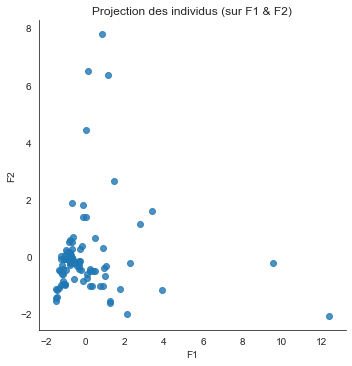

In [59]:
# Projection des individus selon variable illustrative
sns.lmplot(x="F1", y = "F2", data=data_clusters, fit_reg=False)
plt.title("Projection des individus (sur F1 & F2)")
plt.show()

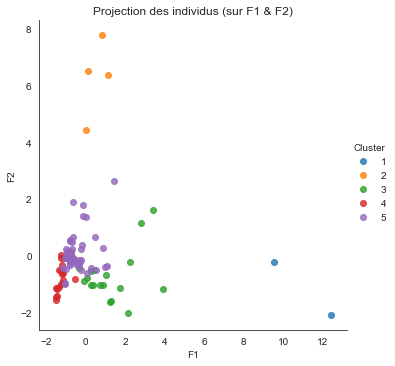

In [60]:
# Projection des individus selon variable illustrative
sns.lmplot(x="F1", y = "F2", hue="Cluster", data=data_clusters, fit_reg=False)
plt.title("Projection des individus (sur F1 & F2)")
plt.show()

In [61]:
# Création df clusters

cluster_cent = pd.DataFrame(data_clusters.groupby(["Cluster" ]).mean())
cluster_cent = cluster_cent.reset_index()
cluster_cent.head(10)

,Cluster,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,F1,F2
0,1,71962.181791,3079.469200,2.750000,51.700000,4.679521e+10,5.074926e+10,4.908070e+08,4.816465e+08,5.137050e+08,5.250245e+08,10.969567,-1.153950
1,2,307369.047761,19620.857506,10.250000,11.200000,6.058593e+09,6.109294e+09,1.090125e+07,1.687400e+07,1.809150e+07,1.965125e+07,0.548590,6.269248
2,3,55630.332482,1691.514668,10.983333,52.527778,5.008495e+10,5.338347e+10,2.584611e+07,2.707967e+07,4.350656e+07,5.443956e+07,1.244132,-0.721081
3,4,31059.047286,1071.086177,37.905556,61.844444,4.304459e+09,4.791116e+09,2.955778e+06,4.860416e+06,1.941221e+06,3.824667e+06,-1.240190,-0.791451
4,5,50516.817000,1001.846848,7.109259,48.796296,9.060775e+09,9.752331e+09,1.301169e+07,1.463718e+07,1.175887e+07,1.513381e+07,-0.448230,0.082528


### Projection Box Plot

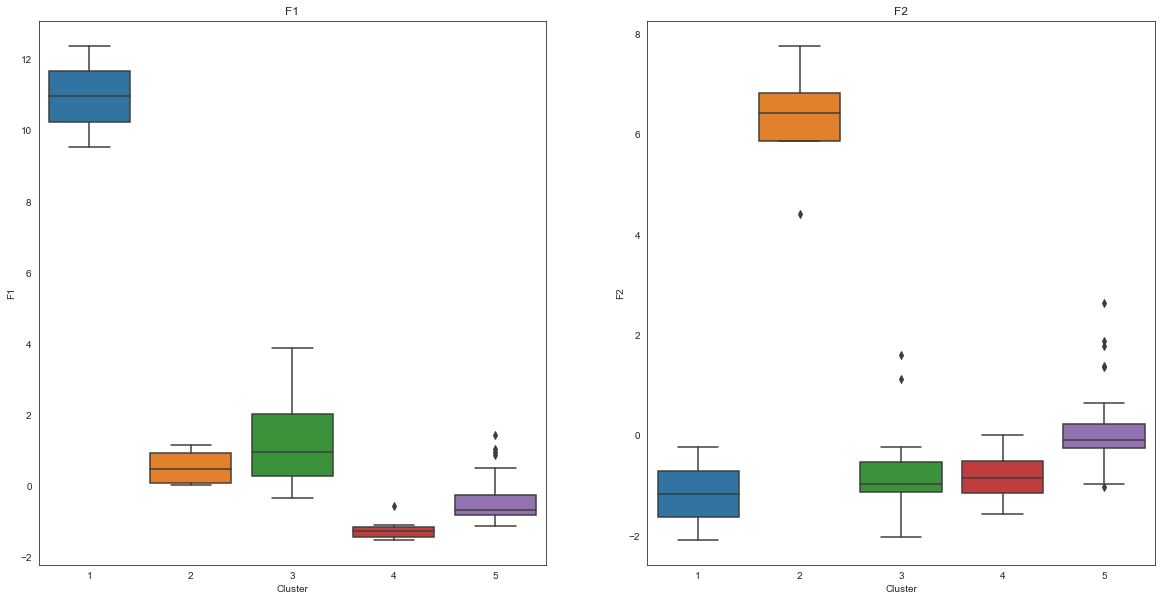

In [62]:
fig=plt.subplots(figsize=(20,10))
plt.subplot(121)
sns.boxplot(x=data_clusters["Cluster"], y=data_clusters["F1"])
plt.title("F1")

plt.subplot(122)
sns.boxplot( x=data_clusters["Cluster"], y=data_clusters["F2"])
plt.title("F2")
plt.show()

In [63]:
# identification cluster 3
data_clusters[data_clusters["Cluster"]==3]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster,F1,F2
Zone,,,,,,,,,,,,,
Arabie saoudite,43484.242388,1513.093222,30.2,51.8,2.090539e+10,2.331989e+10,17495000.0,19146000.0,12897000.0,7157000.0,3,-0.328768,-0.442568
Autriche,40398.884975,240.088043,6.6,53.6,4.788717e+10,5.204726e+10,32714000.0,36944000.0,13086000.0,15975000.0,3,0.892341,-1.029029
Belgique,44544.250945,2041.066611,6.5,56.1,4.411893e+10,4.722576e+10,207538000.0,213538000.0,120048000.0,161248000.0,3,3.906623,-1.175341
Canada,50578.429652,3010.512506,11.2,54.7,4.505729e+10,4.634337e+10,52627000.0,57158000.0,19362000.0,17225000.0,3,1.027137,-0.686012
Danemark,38144.340299,848.376611,4.6,54.9,5.745429e+10,6.180975e+10,9861000.0,9978000.0,83462000.0,96685000.0,3,1.747356,-1.142744
Finlande,36133.429652,-109.911957,3.8,54.6,4.618041e+10,4.995534e+10,1212000.0,1626000.0,53000.0,1573000.0,3,0.361326,-1.037603
France,93271.478607,11235.062148,4.5,47.2,3.856657e+10,4.116865e+10,26061000.0,29312000.0,169977000.0,220354000.0,3,2.814690,1.137559
Irlande,43088.063682,773.262148,9.1,59.1,7.049292e+10,7.966162e+10,6194000.0,7219000.0,12208000.0,14478000.0,3,1.274655,-1.576328
Israël,38481.063682,376.072506,19.4,55.4,4.245033e+10,4.384183e+10,8221000.0,4030000.0,32000.0,29925500.0,3,0.263126,-1.029313


In [176]:
data_clusters[data_clusters["Cluster"]==4]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster,F1,F2
Zone,,,,,,,,,,,,,
Burkina Faso,16335.625473,-159.911957,34.5,72.8,7.382748e+08,8.201668e+08,233000.0,3.840000e+05,135000.0,75000.0,4,-1.506024,-1.465221
Côte d'Ivoire,20907.170149,1886.072506,27.9,65.6,1.570209e+09,1.727629e+09,3825000.0,3.873000e+06,2000.0,29925500.0,4,-1.128008,-0.856546
Ghana,46555.331741,1411.082864,26.3,52.9,2.046043e+09,2.224259e+09,8247000.0,8.903000e+06,2000.0,5000.0,4,-1.079144,-0.093909
Iraq,42002.242388,1477.103580,35.4,54.8,4.980948e+09,5.395860e+09,2092000.0,2.069000e+06,570000.0,59000.0,4,-1.165358,-0.315815
Jordanie,43583.559403,267.088043,52.0,53.8,4.195802e+09,4.264119e+09,6345000.0,5.998000e+06,1570000.0,2588000.0,4,-1.313901,-0.485610
Kenya,28272.210547,2147.137327,29.2,60.2,1.584660e+09,1.725303e+09,732000.0,2.394000e+06,764000.0,462000.0,4,-1.257454,-0.519991
Koweït,47716.738109,392.098401,55.8,51.4,2.889724e+10,3.376074e+10,5836000.0,8.802000e+06,90000.0,116000.0,4,-0.549885,-0.804999
Liban,41211.697711,211.093222,44.0,55.5,8.778472e+09,9.257297e+09,5989000.0,6.028000e+06,0.0,0.0,4,-1.134483,-0.617785
Madagascar,19129.259502,211.088043,31.3,68.5,5.152856e+08,5.273866e+08,826000.0,1.109000e+06,42000.0,81000.0,4,-1.433080,-1.180909


In [170]:
Final_18_countries= data_clusters[data_clusters["Cluster"]==3]

In [177]:
Final_18_countries_cls4= data_clusters[data_clusters["Cluster"]==4]

In [171]:
#Final_18_countries=Final_18_countries.to_csv("Final_18_countries_wd_cluster_3")

In [178]:
#Final_18_countries_cls4=Final_18_countries_cls4.to_csv("Final_18_countries_wd_cluster_4")

# Tests statistique

In [68]:
from scipy.stats import ks_2samp
from scipy import stats

In [69]:
data_clusters.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,Pib_par_habitant_2017,pib_par_habitant_2018,Importations Valeur 2017,Importations Valeur 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd,Cluster,F1,F2
count,96.000000,96.000000,96.000000,96.000000,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,96.000000,9.600000e+01,9.600000e+01
mean,58976.224046,1963.217848,13.650000,50.436458,1.652204e+10,1.770525e+10,2.339879e+07,2.495956e+07,2.659182e+07,3.119412e+07,4.229167,-1.850372e-17,-1.272131e-17
std,60634.951818,4818.913520,15.432658,12.558043,2.016224e+10,2.167078e+10,8.485827e+07,8.382818e+07,8.280886e+07,8.709937e+07,1.030883,1.940200e+00,1.554074e+00
min,15730.397811,-4103.943031,-12.800000,9.300000,3.408700e+08,3.754904e+08,3.500000e+04,8.400000e+04,0.000000e+00,0.000000e+00,1.000000,-1.506024e+00,-2.077644e+00
25%,38167.078060,259.922058,2.850000,48.800000,2.936602e+09,3.186886e+09,2.245750e+06,3.284750e+06,1.042500e+05,1.495000e+05,3.750000,-9.771452e-01,-7.065816e-01
50%,44526.677512,544.088043,11.600000,51.800000,8.468262e+09,9.059415e+09,6.269500e+06,6.913500e+06,9.535000e+05,1.981000e+06,5.000000,-6.303463e-01,-2.271762e-01
75%,49978.185473,1979.567148,20.850000,54.800000,2.060802e+10,2.333938e+10,1.489650e+07,1.850025e+07,1.294425e+07,2.839812e+07,5.000000,2.636655e-01,7.559274e-02
max,430792.746667,38205.097685,75.600000,75.900000,1.100032e+11,1.201380e+11,7.878550e+08,7.778060e+08,6.543220e+08,6.803520e+08,5.000000,1.239062e+01,7.776387e+00


### Ks_2sample method

In [73]:
print("1- pvalue Disponibilité alimentaire (Kcal/personne/jour)")
print(ks_2samp(data_clusters["Disponibilité alimentaire (Kcal/personne/jour)"],list(np.random.normal(np.mean(data_clusters["Disponibilité alimentaire (Kcal/personne/jour)"]), np.std(data_clusters["Disponibilité alimentaire (Kcal/personne/jour)"]), 1000))))

print("2- pvalue Disponibilité de protéines en quantité (g/personne/jour)")
print(ks_2samp(data_clusters["Disponibilité de protéines en quantité (g/personne/jour)"],list(np.random.normal(np.mean(data_clusters["Disponibilité de protéines en quantité (g/personne/jour)"]), np.std(data_clusters["Disponibilité de protéines en quantité (g/personne/jour)"]), 1000))))

print("3-pvalue ratio_protein_anim")
print(ks_2samp(data_clusters["ratio_protein_anim"],list(np.random.normal(np.mean(data_clusters["ratio_protein_anim"]), np.std(data_clusters["ratio_protein_anim"]), 1000))))

print("4-pvalue Exportations Valeur 2018 usd")
print(ks_2samp(data_clusters["Exportations Valeur 2018 usd"],list(np.random.normal(np.mean(data_clusters["Exportations Valeur 2018 usd"]), np.std(data_clusters["Exportations Valeur 2018 usd"]), 1000))))


1- pvalue Disponibilité alimentaire (Kcal/personne/jour)
Ks_2sampResult(statistic=0.3393333333333333, pvalue=1.7316129641287148e-09)
2- pvalue Disponibilité de protéines en quantité (g/personne/jour)
Ks_2sampResult(statistic=0.25616666666666665, pvalue=1.488168705210402e-05)
3-pvalue ratio_protein_anim
Ks_2sampResult(statistic=0.24975, pvalue=2.677962481367757e-05)
4-pvalue Exportations Valeur 2018 usd
Ks_2sampResult(statistic=0.362, pvalue=9.075173945660708e-11)


### Shapiro Wilk

In [146]:
print("1-pvalue Disponibilité alimentaire (Kcal/personne/jour)")
print(stats.shapiro(data_clusters["Disponibilité alimentaire (Kcal/personne/jour)"]))

print("2-pvalue Disponibilité de protéines en quantité (g/personne/jour)")
print(stats.shapiro(data_clusters["Disponibilité de protéines en quantité (g/personne/jour)"]))

print("3-pvalue ratio_protein_anim")
print(stats.shapiro(data_clusters["ratio_protein_anim"]))

print("4-pvalue Exportations Valeur 2018 usd")
print(stats.shapiro(data_clusters["Exportations Valeur 2018 usd"]))

1-pvalue Disponibilité alimentaire (Kcal/personne/jour)
(0.4943920373916626, 1.3705024850310102e-16)
2-pvalue Disponibilité de protéines en quantité (g/personne/jour)
(0.46932148933410645, 5.599664007637745e-17)
3-pvalue ratio_protein_anim
(0.8263931274414062, 2.975200308341641e-09)
4-pvalue Exportations Valeur 2018 usd
(0.3847982883453369, 3.3932354933966535e-18)


## Histogram 

Text(0.5, 1.0, 'Disponibilité alimentaire (Kcal/personne/jour)')

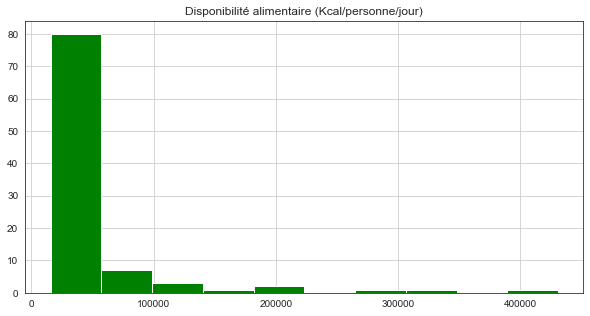

In [166]:
my_data = data_clusters["Disponibilité alimentaire (Kcal/personne/jour)"]
my_data.hist(facecolor='g')
plt.title('Disponibilité alimentaire (Kcal/personne/jour)')

Text(0.5, 1.0, 'Disponibilité de protéines en quantité (g/personne/jour)')

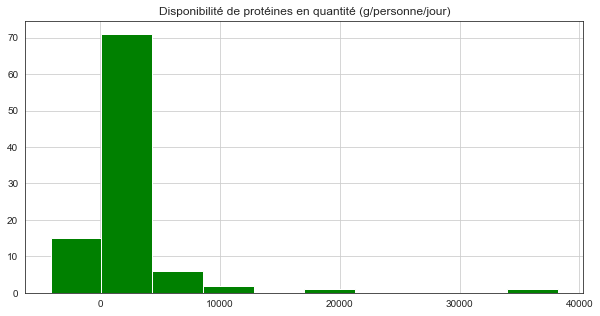

In [167]:
my_data = data_clusters["Disponibilité de protéines en quantité (g/personne/jour)"]
my_data.hist(facecolor='g')
plt.title('Disponibilité de protéines en quantité (g/personne/jour)')

Text(0.5, 1.0, 'ratio_protein_anim')

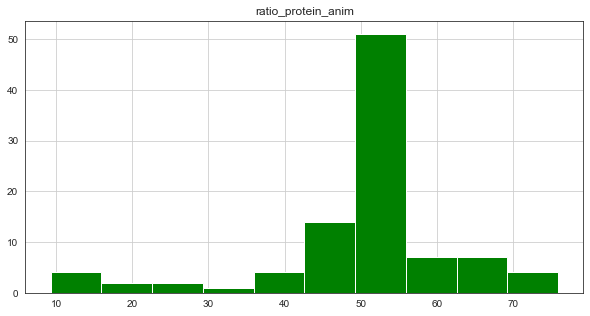

In [168]:
my_data = data_clusters["ratio_protein_anim"]
my_data.hist(facecolor='g')
plt.title('ratio_protein_anim')

Text(0.5, 1.0, 'Exportations Valeur 2018 usd')

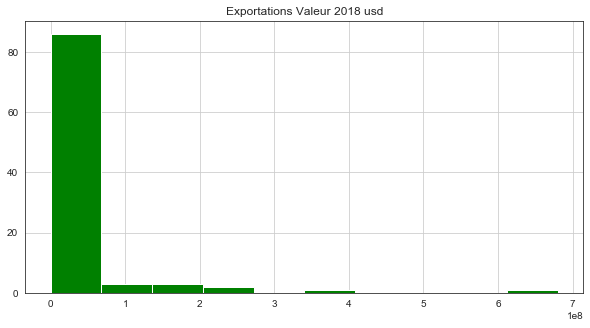

In [169]:
my_data = data_clusters["Exportations Valeur 2018 usd"]
my_data.hist(facecolor='g')
plt.title('Exportations Valeur 2018 usd')

# Test inter clusters

Ici, nous voulons faire un test de comparaison entre la même variable de deux clusters. Nous allons donc faire une comparaison gaussienne.

h0 = les deux distributions indépendantes ont la même valeur moyenne

Risque alpha 5 %.

In [154]:
cluster_test1 = data_clusters[data_clusters['Cluster'] == 0]['ratio_protein_anim']
cluster_test2 = data_clusters[data_clusters['Cluster'] == 1]['ratio_protein_anim']

In [155]:
#On teste tout d’abord l’égalité des variances à l’aide de la commande
from scipy.stats import bartlett
stat, p = bartlett(cluster_test1, cluster_test2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des variances au niveau de test 5%')
else:
    print('H0 est rejetée au niveau de test 5%')

Statistics=nan, p=nan
H0 est rejetée au niveau de test 5%


In [156]:
#On teste ensuite l’égalité des moyennes à l’aide de la commande
from scipy.stats import ttest_ind
stat, p = ttest_ind(cluster_test1, cluster_test2, equal_var=True)
print('Statistics=%.3f, p=%.9f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des moyennes de nos 2 clusters au niveau de test 5%')
else:
    print('H0 l\'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%')

Statistics=nan, p=nan
H0 l'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%


# We reject that our two clusters follow the same distribution, we have indeed rejected the hypothesis of equality of means.

The statistical tests carried out allow us to verify that our clusters do not follow the same distribution, in fact the hypothesis of equality of means was rejected in the previous test. The identified clusters are distinct.

# With other clusters

In [157]:
cluster_test1 = data_clusters[data_clusters['Cluster'] == 1]['ratio_protein_anim']
cluster_test2 = data_clusters[data_clusters['Cluster'] == 2]['ratio_protein_anim']

In [158]:
#On teste tout d’abord l’égalité des variances à l’aide de la commande
from scipy.stats import bartlett
stat, p = bartlett(cluster_test1, cluster_test2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des variances au niveau de test 5%')
else:
    print('H0 est rejetée au niveau de test 5%')

Statistics=2.419, p=0.120
On ne rejette donc pas H0, l’égalité des variances au niveau de test 5%


In [159]:
#On teste ensuite l’égalité des moyennes à l’aide de la commande
from scipy.stats import ttest_ind
stat, p = ttest_ind(cluster_test1, cluster_test2, equal_var=True)
print('Statistics=%.3f, p=%.9f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des moyennes de nos 2 clusters au niveau de test 5%')
else:
    print('H0 l\'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%')

Statistics=41.662, p=0.000001984
H0 l'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%


In [160]:
cluster_test1 = data_clusters[data_clusters['Cluster'] == 3]['ratio_protein_anim']
cluster_test2 = data_clusters[data_clusters['Cluster'] == 4]['ratio_protein_anim']

In [161]:
#On teste tout d’abord l’égalité des variances à l’aide de la commande
from scipy.stats import bartlett
stat, p = bartlett(cluster_test1, cluster_test2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des variances au niveau de test 5%')
else:
    print('H0 est rejetée au niveau de test 5%')

Statistics=5.231, p=0.022
H0 est rejetée au niveau de test 5%


In [162]:
#On teste ensuite l’égalité des moyennes à l’aide de la commande
from scipy.stats import ttest_ind
stat, p = ttest_ind(cluster_test1, cluster_test2, equal_var=True)
print('Statistics=%.3f, p=%.9f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des moyennes de nos 2 clusters au niveau de test 5%')
else:
    print('H0 l\'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%')

Statistics=-3.845, p=0.000504293
H0 l'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%


## Thank you